# Assignment 2 - Reproducible Data Analysis of College Rankings

This skeleton notebook lays out the various questions and tasks that you need to undertake.

Essential links:
- College Scorecard: https://collegescorecard.ed.gov/
- College Scorecard Data: https://collegescorecard.ed.gov/data/ (Use the data linked as "Most Recent Data" under "Featured Downloads")
- Full data documentation: https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf (**Be sure to read this carefully as it defines what the columns mean**)
- Data dictionary: https://collegescorecard.ed.gov/assets/CollegeScorecardDataDictionary.xlsx (Definitions of abbreviations, variable names, possible values for each variable, etc.)

Additional links:
- Some background context on the college scorecard: http://www.nytimes.com/2015/09/13/us/with-website-to-research-colleges-obama-abandons-ranking-system.html
- College Scorecard StackExchange: http://opendata.stackexchange.com/questions/tagged/collegescorecard


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Makes it so that you can scroll horizontally to see all columns of an output DataFrame
pd.set_option('display.max_columns', None)

# This magic function allows you to see the charts directly within the notebook. 
%matplotlib inline

# This command will make the plots more attractive by adopting the commone style of ggplot
matplotlib.style.use("ggplot")

In [2]:
#Load the csv file in a dataframe
college_sc_df=pd.read_csv("Datasets/Most-Recent-Cohorts-All-Data-Elements.csv")

C:\Users\kavas\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6,9,1170,1171,1172,1173,1174,1175,1177,1178,1179,1181,1183,1184,1185,1186,1187,1188,1190,1192,1196,1198,1199,1200,1201,1209,1211,1212,1213,1214,1222,1223,1224,1225,1226,1227,1235,1236,1237,1238,1239,1240,1248,1249,1251,1252,1253,1257,1261,1262,1264,1265,1266,1270,1274,1275,1276,1277,1278,1279,1282,1283,1287,1288,1289,1290,1291,1292,1295,1296,1309,1322,1326,1327,1328,1329,1330,1331,1333,1334,1335,1339,1340,1341,1342,1343,1344,1346,1347,1348,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1411,1425,1427,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1517,1529,1530,1532,1537,1540,1541,1542,1546,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1605,1606,1608,1609,1610,1

### 1. What percentage of undergraduate degree-seeking students attend "private for-profit" schools?

In [143]:
prifprof_df=college_sc_df[college_sc_df["CONTROL"] == 3]
prifprof_ug_count=prifprof_df["UG"].sum() 

total_ug_count=college_sc_df["UG"].sum()

perc_prifprof=(float(prifprof_ug_count)/total_ug_count)*100

print "The percentage of undergraduate degree-seeking students attending private for-profit schools is:",perc_prifprof

The percentage of undergraduate degree-seeking students attending private for-profit schools is: 3.40257862651


### 2. In comparing predominently four-year "public", "private non-profit", and "private for-profit" schools which type of school has the highest median completion rate for students? Create a bar chart that shows the comparison (be sure to use appropriately labeled axes, tick marks, title, and colors). 
Note: Define completion rate as those students completing within 150% of the expected time for completion. 

In [108]:
fouryear_df=college_sc_df[college_sc_df["PREDDEG"] == 3]
median_public=fouryear_df[college_sc_df["CONTROL"] == 1]["C150_4"].median()
median_nonpf=fouryear_df[college_sc_df["CONTROL"] == 2]["C150_4"].median()
median_pf=fouryear_df[college_sc_df["CONTROL"] == 3]["C150_4"].median()

lst_medians=[median_public,median_nonpf,median_pf]
df_medians=pd.DataFrame(data=lst_medians, columns=['med_val'])

C:\Users\kavas\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\kavas\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\kavas\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Container object of 3 artists>

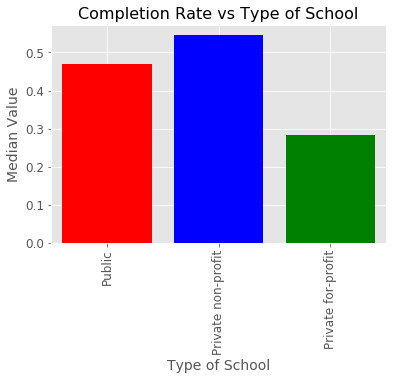

In [179]:
fig,ax= plt.subplots()
labels = ['Public','Private non-profit','Private for-profit']
ax=df_medians.med_val.plot(kind="bar",color="blue", title="Median of completion rates", fontsize=12)

ax.set_xticklabels(labels)
ax.set_ylabel('Median Value',fontsize=14)
ax.set_xlabel('Type of School',fontsize=14)
ax.set_title('Completion Rate vs Type of School',fontsize=16)
bar_locations = np.arange(3)
data=df_medians.med_val
ax.bar(bar_locations, data, color=['red', 'blue','green'])

### 3. Among predominently four-year schools (i.e. bachelor's degree granting), what is the median debt of graduates in dollars? Do men or women typically have higher median debt and by how much?
Hint: You will need to do some filtering away of rows that are not "PrivacySuppressed" otherwise you won't be able to calculate the median value

In [136]:
grad_debt_df=fouryear_df.loc[fouryear_df["GRAD_DEBT_MDN"]!="PrivacySuppressed"]
med_debt=grad_debt_df["GRAD_DEBT_MDN"].median()
print "Median debt of graduates in dollars is:",med_debt

female_debt_df=fouryear_df.loc[fouryear_df["FEMALE_DEBT_MDN"]!="PrivacySuppressed"]
female_med_debt=female_debt_df["FEMALE_DEBT_MDN"].median()
print "Median debt for women in dollars is:",female_med_debt

male_debt_df=fouryear_df.loc[fouryear_df["MALE_DEBT_MDN"]!="PrivacySuppressed"]
male_med_debt=female_debt_df["MALE_DEBT_MDN"].median()
print "Median debt for men in dollars is:",male_med_debt

diff_debt=female_med_debt-male_med_debt
print "Women have a higher median debt by:",diff_debt

Median debt of graduates in dollars is: 25000.0
Median debt for women in dollars is: 16808.25
Median debt for men in dollars is: 15201.5
Women have a higher median debt by: 1606.75


### 4. How do predominently four-year schools compare to predominently two-year schools in terms of the percentage of students who are in default of their loan within three years of graduation? Amongst all four-year schools which school had the highest percentage of such students?


In [192]:
fouryear_df=college_sc_df[college_sc_df["PREDDEG"] == 3]
default_fouryear=fouryear_df["CDR3"].mean()*100

twoyear_df=college_sc_df[(college_sc_df["PREDDEG"] == 1) | (college_sc_df["PREDDEG"] == 2)]
default_twoyear=twoyear_df["CDR3"].mean()*100

print "The percentage of students who are in default of their loan in four-year schools is",default_fouryear,"compared to the that in two-year schools that is",default_twoyear

fouryear_df=fouryear_df.sort_values(by="CDR3", ascending=False)
print "The four-year school with highest percentage of students who defaulted is",fouryear_df.iloc[0].INSTNM,"with a percentage of",fouryear_df.iloc[0].CDR3*100

<class 'pandas.core.frame.DataFrame'>
The percentage of students who are in default of their loan in four-year schools is 7.66220668997 compared to the that in two-year schools that is 15.2750882501
The four-year school with highest percentage of students who defaulted is Martin University with a percentage of 32.9


### 5. Create two histogram charts in order to compare the distribution of annual cost of attendance for four-year schools and two-year schools (be sure to include appropriate axes, labels, and titles on the charts).

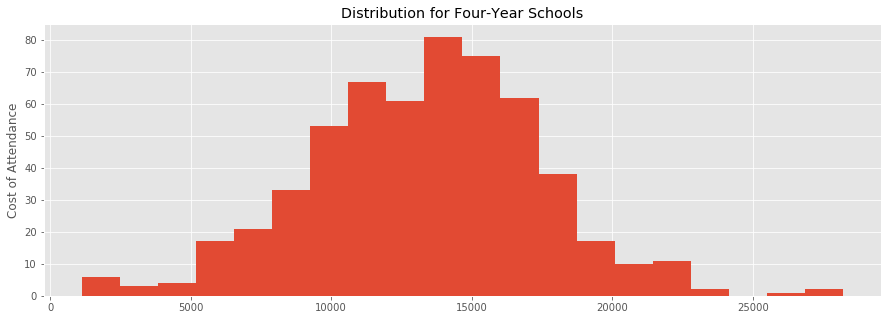

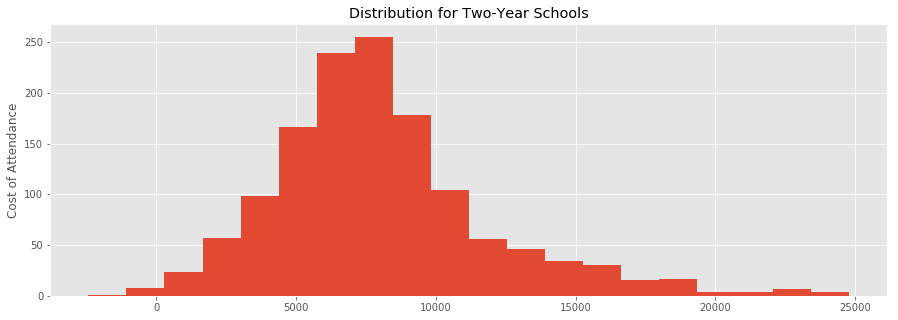

In [212]:
#Label the graph and the axes
fig = plt.figure()
fouryear_df.hist(column="NPT4_PUB", bins=20, figsize=(15,5),sharex=True,sharey=True)
plt.title('Distribution for Four-Year Schools')
plt.ylabel('Cost of Attendance')
twoyear_df.hist(column="NPT4_PUB", bins=20, figsize=(15,5),sharex=True,sharey=True)
plt.title('Distribution for Two-Year Schools')
plt.ylabel('Cost of Attendance')

### 6. Your Own Data-Driven Insight
Come up with a unique insight by analyzing the data in a way that hasn't been considered in the previous questions. You might examine other variables or charting options for instance. **Your insight should be easily stated in a sentence or two, or captured by a chart that could be similarly explained in a caption.** Try to think like a journalist: Spend some time trying to make your insight something that could be a headline for a news article - that could entail some type of surprising result, social inequity, or implication for education policy. Be sure to show your entire code and process for deriving your insight. 

In [289]:
college_sc_df=pd.read_csv("Datasets/Most-Recent-Cohorts-All-Data-Elements1.csv")

In [409]:
# The answer depends on what you pursue. 
college_sc_df=college_sc_df.loc[(college_sc_df["MEDIAN_HH_INC"]<>"PrivacySuppressed")]
city_df=college_sc_df[(college_sc_df["LOCALE"] == 11) | (college_sc_df["LOCALE"] == 12) | (college_sc_df["LOCALE"] == 13)]
suburb_df=college_sc_df[(college_sc_df["LOCALE"] == 21) | (college_sc_df["LOCALE"] == 22) | (college_sc_df["LOCALE"] == 23)]
town_df=college_sc_df[(college_sc_df["LOCALE"] == 31) | (college_sc_df["LOCALE"] == 32) | (college_sc_df["LOCALE"] == 33)]
rural_df=college_sc_df[(college_sc_df["LOCALE"] == 41) | (college_sc_df["LOCALE"] == 42) | (college_sc_df["LOCALE"] == 43)]

mn_city_inc=city_df["MEDIAN_HH_INC"].astype(float).fillna(0.0).mean()
mn_suburb_inc=suburb_df["MEDIAN_HH_INC"].astype(float).fillna(0.0).mean()
mn_town_inc=town_df["MEDIAN_HH_INC"].astype(float).fillna(0.0).mean()
mn_rural_inc=rural_df["MEDIAN_HH_INC"].astype(float).fillna(0.0).mean()

mn_city_pov=city_df["POVERTY_RATE"].astype(float).fillna(0.0).mean()
mn_suburb_pov=suburb_df["POVERTY_RATE"].astype(float).fillna(0.0).mean()
mn_town_pov=town_df["POVERTY_RATE"].astype(float).fillna(0.0).mean()
mn_rural_pov=rural_df["POVERTY_RATE"].astype(float).fillna(0.0).mean()

In [530]:
lst_mean_income=[mn_city_inc,mn_suburb_inc,mn_town_inc,mn_rural_inc]
lst_mean_poverty=[mn_city_pov,mn_suburb_pov,mn_town_pov,mn_rural_pov]
lst_locale=['City','Suburb','Town','Rural']

In [408]:
table = [lst_locale,lst_mean_income, lst_mean_poverty]
df_means = pd.DataFrame(table)
df_means = df_means.transpose()
cols = ['Locale','MeanIncome', 'MeanPoverty']
df_means.columns = cols
print df_means

   Locale MeanIncome MeanPoverty
0    City    42219.9     8.20008
1  Suburb    44340.3     7.26637
2    Town    47506.4     9.24202
3   Rural    45935.3     10.1116


The dataset has attributes related to the locale of the university, median income and the poverty rate in the localtiy.
A general assumption would be that median income is higher in the city compared to rural area.
Also, the poverty rate would be lower for locality with higher income.
The bar chart below shows the comparison of income to poverty for the different locales in the dataset.
We conclude that the average income is highest in a town and there is no relationship between poverty and income for a locality.


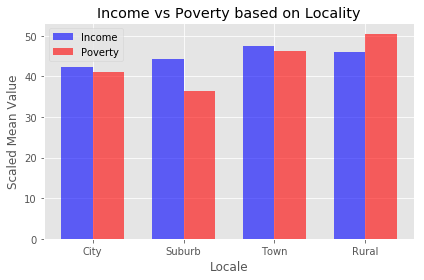

In [422]:
print "The dataset has attributes related to the locale of the university, median income and the poverty rate in the localtiy."
print "A general assumption would be that median income is higher in the city compared to rural area."
print "Also, the poverty rate would be lower for locality with higher income."
print "The bar chart below shows the comparison of income to poverty for the different locales in the dataset."
print "We conclude that the average income is highest in a town and there is no relationship between poverty and income for a locality."

n_groups = 4

#Mean Income scaled down by a factor of 100
means_income = (42219.9/100, 44340.3/100, 47506.4/100, 45935.3/100)
#Mean Poverty scaled up by a factor of 5
means_poverty = (8.20008*5, 7.26637*5, 9.24202*5, 10.1116*5)

#Plotting Bar graphs to compare Mean Income vs Poverty based on Locale
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity =0.6

rects1 = plt.bar(index, means_income, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Income')

rects2 = plt.bar(index + bar_width, means_poverty, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Poverty')

#Reference: http://people.duke.edu/~ccc14/pcfb/numpympl/MatplotlibBarPlots.html
#Label the graph and the axes
plt.xlabel('Locale')
plt.ylabel('Scaled Mean Value')
plt.title('Income vs Poverty based on Locality')
plt.xticks(index + bar_width / 2, ('City','Suburb','Town','Rural'))
plt.legend()

plt.tight_layout()
plt.show()

### 7. Create a Ranking
One of the most well-known college rankings is the US News and World Report ranking. They actually publish their entire [methodology](http://www.usnews.com/education/best-colleges/articles/how-us-news-calculated-the-rankings), including the data they use and how it's weighted in arriving at the final rankings. 

Here you'll create your own educational ranking by combining and weighting a subset of the College Scorecard data. The three pieces of data (and their weightings) you should use include: income 10 years after entry (50% weight, higher is better), average net price (25% weight, lower is better), % who graduate in 6 years (25% weight, higher is better). Unlike the US News ranking, this ranking clearly privileges money (i.e., How well off are graduates?).

Be sure to print out the full top 100 ranking. What number position does UMD, College Park have on this ranking? 

In [490]:
college_sc_df=pd.read_csv("Datasets/Most-Recent-Cohorts-All-Data-Elements.csv")
college_sc_df=college_sc_df[(college_sc_df["MN_EARN_WNE_P10"] <> 'PrivacySuppressed')]

In [522]:
#function to calculate score
def func_univScore(x):
    global global_df_rank
    x.SCORE_FOR_RANK = (x.MN_EARN_WNE_P10)*0.5 - (x.NPT4_PUB+x.NPT4_PRIV)*0.25 + x.C150_4*0.25
    global_df_rank = global_df_rank.append(x)
    return

college_sc_df=college_sc_df[["INSTNM","MN_EARN_WNE_P10","NPT4_PUB","NPT4_PRIV","C150_4"]]
college_sc_df["SCORE_FOR_RANK"]='0'

college_sc_df['MN_EARN_WNE_P10'] = college_sc_df['MN_EARN_WNE_P10'].astype('float').fillna(0.0)
college_sc_df['NPT4_PUB'] = college_sc_df['NPT4_PUB'].astype('float').fillna(0.0)
college_sc_df['NPT4_PRIV'] = college_sc_df['NPT4_PRIV'].astype('float').fillna(0.0)
college_sc_df['C150_4'] = college_sc_df['C150_4'].astype('float').fillna(0.0)
college_sc_df['SCORE_FOR_RANK'] = college_sc_df['SCORE_FOR_RANK'].astype('float').fillna(0.0)

global_df_rank=pd.DataFrame(columns=college_sc_df.columns)
college_sc_df.apply(func_univScore, axis=1)
#Arrange in descending order of score to print top 100
global_df_rank = global_df_rank.sort_values(by="SCORE_FOR_RANK", ascending=False)

global_df_rank=global_df_rank.reset_index()
global_df_rank[0:100]

,index,INSTNM,MN_EARN_WNE_P10,NPT4_PUB,NPT4_PRIV,C150_4,SCORE_FOR_RANK
0,4127,Medical College of Wisconsin,250000.0,0.0,0.0,0.0000,125000.000000
1,4089,West Virginia School of Osteopathic Medicine,243400.0,0.0,0.0,0.0000,121700.000000
2,2050,A T Still University of Health Sciences,235900.0,0.0,0.0,0.0000,117950.000000
3,1704,University of Massachusetts Medical School Wor...,228400.0,0.0,0.0,0.0000,114200.000000
4,5237,Louisiana State University Health Sciences Cen...,220100.0,0.0,0.0,0.0000,110050.000000
5,2358,Albany Medical College,217700.0,0.0,0.0,0.0000,108850.000000
6,3654,Baylor College of Medicine,209900.0,0.0,0.0,0.0000,104950.000000
7,3807,University of North Texas Health Science Center,199000.0,0.0,0.0,0.0000,99500.000000
8,3347,Philadelphia College of Osteopathic Medicine,187700.0,0.0,0.0,0.0000,93850.000000
9,3903,Eastern Virginia Medical School,187000.0,0.0,0.0,0.0000,93500.000000


In [523]:
UMD_CP_RANK=global_df_rank.loc[global_df_rank['INSTNM'] == "University of Maryland-College Park"].index+1
print "Rank for UMD-College Park based on the current ranking is:",np.int64(UMD_CP_RANK)

global_df_rank.loc[global_df_rank['INSTNM'] == "University of Maryland-College Park"]

Rank for UMD College Park based on the current ranking is: [159]


,index,INSTNM,MN_EARN_WNE_P10,NPT4_PUB,NPT4_PRIV,C150_4,SCORE_FOR_RANK
158,1598,University of Maryland-College Park,67200.0,15817.0,0.0,0.8475,29645.961875


### EXTRA CREDIT (worth up to 5 points). If you were to systematically manipulate the weights on the ranking from the last question, what's the highest possible position in the ranking that UMD could take? Which of the 3 factors is most heavily weighted when UMD takes that optimal position?

In [527]:
def func_univScore(x):
    global global_df_rank
    x.SCORE_FOR_RANK = x.C150_4
    global_df_rank = global_df_rank.append(x)
    return

college_sc_df=college_sc_df[["INSTNM","MN_EARN_WNE_P10","NPT4_PUB","NPT4_PRIV","C150_4"]]
college_sc_df["SCORE_FOR_RANK"]='0'

college_sc_df['MN_EARN_WNE_P10'] = college_sc_df['MN_EARN_WNE_P10'].astype('float').fillna(0.0)
college_sc_df['NPT4_PUB'] = college_sc_df['NPT4_PUB'].astype('float').fillna(0.0)
college_sc_df['NPT4_PRIV'] = college_sc_df['NPT4_PRIV'].astype('float').fillna(0.0)
college_sc_df['C150_4'] = college_sc_df['C150_4'].astype('float').fillna(0.0)
college_sc_df['SCORE_FOR_RANK'] = college_sc_df['SCORE_FOR_RANK'].astype('float').fillna(0.0)

global_df_rank=pd.DataFrame(columns=college_sc_df.columns)
college_sc_df.apply(func_univScore, axis=1)
global_df_rank = global_df_rank.sort_values(by="SCORE_FOR_RANK", ascending=False)
global_df_rank=global_df_rank.reset_index()

In [529]:
UMD_CP_RANK=global_df_rank.loc[global_df_rank['INSTNM'] == "University of Maryland-College Park"].index+1
print "UMD-College Park has a high value for percentage who graduate in 6 years"
print "Hence, the highest possible position in the ranking that UMD-College Park could take based on the parameter 'C150_4' is:",np.int64(UMD_CP_RANK)

global_df_rank.loc[global_df_rank['INSTNM'] == "University of Maryland-College Park"]

UMD-College Park has a high value for percentage who graduate in 6 years
Hence, the highest possible position in the ranking that UMD-College Park could take based on the parameter 'C150_4' is: [110]


,index,INSTNM,MN_EARN_WNE_P10,NPT4_PUB,NPT4_PRIV,C150_4,SCORE_FOR_RANK
109,1598,University of Maryland-College Park,67200.0,15817.0,0.0,0.8475,0.8475
